<a href="https://colab.research.google.com/github/trisha025/hybrid-dl-model/blob/master/hybrid_dl_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/EKami/deep_learning_A-Z

Cloning into 'deep_learning_A-Z'...
remote: Enumerating objects: 10305, done.
remote: Total 10305 (delta 0), reused 0 (delta 0), pack-reused 10305
Receiving objects: 100% (10305/10305), 237.98 MiB | 34.02 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Checking out files: 100% (10130/10130), done.


In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#importing dataset
dataset = pd.read_csv('deep_learning_A-Z/Volume_2-Unsupervised_Deep_Learning/Part_4-Self_Organizing_Maps-SOM/Section_20-Building_a_SOM/Credit_Card_Applications.csv')

In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [0]:
X = sc.fit_transform(X)

In [9]:
#uploading data file (code snippet available in Google Colab)
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving minisom.py to minisom.py
User uploaded file "minisom.py" with length 10989 bytes


In [0]:
#training the SOM
from minisom import MiniSom

In [0]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [0]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [0]:
#data visualisation
from pylab import bone, pcolor, colorbar, plot, show 

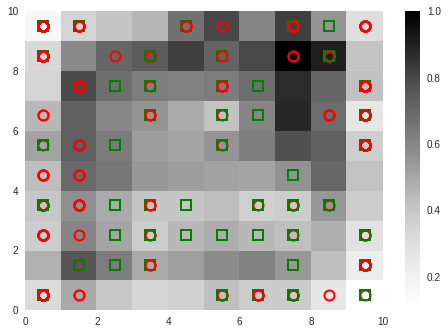

In [14]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
      w[1] + 0.5,
      markers[y[i]],
      markeredgecolor = colors[y[i]],
      markerfacecolor = 'None',
      markersize = 10,
      markeredgewidth = 2)

In [0]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,8)], mappings[(8,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [17]:
print(frauds)

[[1.5706762e+07 0.0000000e+00 4.0830000e+01 3.5000000e+00 2.0000000e+00
  3.0000000e+00 5.0000000e+00 5.0000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.1600000e+03 1.0000000e+00]
 [1.5651460e+07 0.0000000e+00 6.9500000e+01 6.0000000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5796813e+07 1.0000000e+00 4.1580000e+01 1.7500000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 2.1000000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5731166e+07 1.0000000e+00 4.0920000e+01 8.3500000e-01 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.3000000e+02 2.0000000e+00]
 [1.5649379e+07 1.0000000e+00 4.2750000e+01 3.0000000e+00 2.0000000e+00
  3.0000000e+00 5.0000000e+00 1.0000000e+00 1.0000000e+00 0.

In [0]:
#Supervised to Unsupervised Deep Learning
#matrix of features
customers = dataset.iloc[:,1:].values

In [0]:
#dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [21]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [25]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense
#initialising model
classifier = Sequential()

Using TensorFlow backend.


In [0]:
#adding input and first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15 ))

In [0]:
#adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) 

In [0]:
#compiling the data
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
#fitting the model (choosing the number of epochs)
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.4475 - acc: 0.9710
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1471 - acc: 0.9710


In [0]:
#making predictions for probablities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
#sorting
y_pred = y_pred[y_pred[:, 1].argsort()]

In [38]:
print(y_pred)

[[1.57785890e+07 1.60370511e-03]
 [1.57574340e+07 1.81813096e-03]
 [1.56993400e+07 2.31241714e-03]
 ...
 [1.57845260e+07 3.43787223e-01]
 [1.57486490e+07 3.43787223e-01]
 [1.55941330e+07 3.43787223e-01]]
